In [1]:
#import nltk
import random
import logging
import pandas as pd
import tensorflow as tf
from tensorflow import keras

#nltk.download("punkt")
# Only log error messages
tf.get_logger().setLevel(logging.ERROR)
# Set random seed
tf.keras.utils.set_random_seed(42)

2023-04-21 14:14:15.908241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 14:14:16.433848: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/cuda/lib:/usr/local/cuda/lib64:
2023-04-21 14:14:16.433900: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/cuda/lib:/usr/local/cuda/lib64:
2023-04-21 14:

In [2]:
from pathlib import Path

from tokenizers import ByteLevelBPETokenizer

paths = "/home/john_zhang/EEG_NLP/flattened_list.txt"

# Initialize a tokenizer
# tokenizer = ByteLevelBPETokenizer()

# # Customize training
# tokenizer.train(files=paths, vocab_size=52_000, min_frequency=2, special_tokens=[
#     "<s>",
#     "<pad>",
#     "</s>",
#     "<unk>",
#     "<mask>",
# ])

# # Save files to disk
# tokenizer.save_model(".", "esperberto")

In [3]:
tokenizer.save_model("./bpe", "esperberto")

['./bpe/esperberto-vocab.json', './bpe/esperberto-merges.txt']

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

s = 1000
TOKEN_LENGTH = 30 #ms
WORD_LENGTH = 10*s #s
SENTENCE_LENGTH = 100*s #s

TOKENIZER_BATCH_SIZE = 256


In [4]:
import pickle
# with open('sam_dataset.pkl', 'wb') as f:
#     pickle.dump(train_data, f)
with open('sam_dataset.pkl', 'rb') as f:
    train_data = pickle.load(f)

In [10]:
train_data[0][0]

'cccdeeeffffffeefffedddeeefffffggfffeefffggffefffeeeeeddeefffeeeeeeeedefffggffffffffgfggggghhhggggghggggghhhhggghhhhggggggggggggggggggggggggggggggggfgggggggghhggggggggggggggggggggghhhhggggggggghhhggfffffggggggffffffffffggggffffffffggggggfffffffeeeedeeeeefffeffffffffeefffffffffeeeeffffggfffeedddddccccccbbbaaaaaaaaaaaaaaaaaaaaaaaaaaaa aaaabbbccddddefffffffffffffeeedccbbaaaaaaaaaaaaaaaabbbbbbbbbbbbbccddccccccccccdddefgggghhhhhhggfedccbbbbbbbbbbbbbbbbcbbbccccbbbbbccccdddeeedddddeeeeffeeeeeeeeeeeeefffgggffffedddeeedccdddddccbccccdddddccccbbcccbbbbbbbbbbcbbbbbbbccccccdeeeeeddddeefffffffffffffffffedddcccdddddededdddeeffggggffffgggffffffeffgggggfgfffefffgggggggggggfff fffffffggffeeeffffeeeeeeeeeffffeeeeefffeeefffeddeedcccbbbbaaaaaaaaaaaaaaabbbbbbbbbbbbbcccddddeeeedccccdddeeeedccbbbbbbbbbbaaaaabaaaaaaaaaaaaabbbbbbbbaaaaaabbbbbbcccccccdddcccdefffffffggffeefeeedccbbbbbbaaaaaaaaabbbaaaabbbbbbbbbbbcddedcccdddeefffgggggggfffeedccbbbbbbaabbbbbbbaaaabaabbbcccccdddddddddeffggggffeeeeefffffffeedddeffffd

In [12]:
t = tokenizer.encode(train_data[0][0])

In [28]:
maxcout = 0
num_ones = 0
counts = []
for i in range(len(train_data)):
    for t in train_data[i]:
        en = tokenizer.encode(t)
        num_ones += tf.reduce_sum(tf.cast(tf.equal(en.ids, 1), tf.int32))
        counts.append(len(en.ids))
        if len(en.ids) > maxcout:
            maxcout = len(en.ids)

In [27]:
print(num_ones)


tf.Tensor(0, shape=(), dtype=int32)


<BarContainer object of 137355 artists>

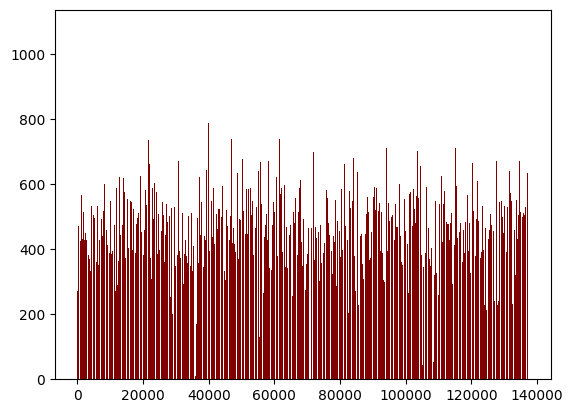

In [31]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset

 
# creating the bar plot
plt.bar(range(len(counts)),counts, color ='maroon')

In [32]:
sum(counts)/len(counts)

464.4852244184777

In [5]:

from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=52_000,
    max_position_embeddings=514,
    num_attention_heads=1,
    num_hidden_layers=1,
    type_vocab_size=1,
)
  

/home/john_zhang/.conda/envs/eeg_nlp/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:

from tokenizers.implementations import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing


tokenizer = ByteLevelBPETokenizer(
    "./bpe/vocab.json",
    "./bpe/merges.txt",
)

In [7]:

tokenizer._tokenizer.post_processor = BertProcessing(
    ("</s>", tokenizer.token_to_id("</s>")),
    ("<s>", tokenizer.token_to_id("<s>")),
)
tokenizer.enable_truncation(max_length=512)

In [8]:
from transformers import RobertaTokenizerFast
tokenizer_folder = "./bpe"

tokenizer = RobertaTokenizerFast.from_pretrained(tokenizer_folder, return_special_tokens_mask=True, max_length=512)  

#tokenizer.save_pretrained(tokenizer_folder)

In [9]:

from transformers import BertConfig

config = BertConfig(
    vocab_size=52_000,
    max_position_embeddings=514,
    num_attention_heads=1,
    num_hidden_layers=1,
    type_vocab_size=1,
)
     

In [10]:

from transformers import BertModel

model = BertModel(config=config)

RuntimeError: Failed to import transformers.models.bert.modeling_bert because of the following error (look up to see its traceback):
/home/john_zhang/.conda/envs/eeg_nlp/lib/python3.9/site-packages/torch/lib/libtorch_cuda.so: undefined symbol: cudaGraphDebugDotPrint, version libcudart.so.11.0

In [24]:
model.num_parameters()

48065056

In [25]:
from transformers import LineByLineTextDataset

dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path="tmp_data.txt",
    block_size=128,
)

2023-04-20 13:53:20.801010: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 13:53:22.160270: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/cuda/lib:/usr/local/cuda/lib64:
2023-04-20 13:53:22.160332: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/cuda/lib:/usr/local/cuda/lib64:
2023-04-20 13:

In [28]:
dataset.examples

[{'input_ids': tensor([  0,  63,  17,  29,  18,  22,  24,  20,  25,  23,  27,  22,  24,  73,
           17,  20,  26, 225,  17,  21,  18,  20,  23,  25,  27,  29,  29,  27,
           26,  73,  17,  20,  25, 225,  17,  26,  18,  21,  24,  26,  20,  23,
           21,  27,  25,  73,  17,  20,  26, 225,  18,  18,  18, 225,  17,  21,
           18,  29,  20,  23,  29,  28,  20,  24,  26,  73,  17,  20,  25,   2])},
 {'input_ids': tensor([  0, 225,  17,  21,  18,  21,  24,  27,  25,  24,  25,  27,  29,  73,
           17,  20,  25, 225, 225,  29,  18,  20,  22,  25,  26,  24,  21,  20,
           23,  73,  17,  20,  27,  65,  16,  63, 225,  25,  18,  21,  29,  29,
           20,  22,  23,  22,  20,  73,  17,  20,  27, 225, 225,  24,  18,  25,
           22,  25,  25,  21,  28,  29,  23,  73,  17,  20,  26, 225,  17,  27,
           18,  26,  26,  27,  28,  28,  27,  26,  27,  73,  17,  20,  28, 225,
           18,  18,  18, 225,  17,  24,  18,  29,  29,  23,  23,  28,  22,  21,
           

In [26]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./EsperBERTo",
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_gpu_train_batch_size=64,
    save_steps=10_000,
    save_total_limit=2,
    prediction_loss_only=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)
     

In [ ]:
srun --partition=gpu --time=24:00:00 --nodes=1 --ntasks-per-node=160 -- sockets-per-node=2 --cores-per-socket=20 --threads-per-core=4 --memper-cpu=1200 --wait=0 --export=ALL --gres=gpu:v100:4 --pty /bin/bash